# Keras Intensive Run Analysis

In [28]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#to load matlab mat files
from scipy.io import loadmat
# for saving metrics
import os 
import json

In [29]:
# GLOBAL VARIABLES
labels = ["fear", "angry", "surprise", "neutral"]

In [30]:
import re 
import json

values = {}

# Get values from files
folders = [f for f in os.listdir(f"./metrics/{'_'.join(labels)}/archive") if os.path.isdir(os.path.join(f"./metrics/{'_'.join(labels)}/archive", f))]
folders.sort(key = lambda folder: (float(re.split("iter_|batchS_|hyper_|hlayers__|_", folder)[2]), '_'.join(re.split("iter_|batchS_|hyper_|hlayers__|_", folder)[4:])))
for folder in folders:
    # Get categories from folder name
    folderSplit = re.split("iter_|batchS_|hyper_|hlayers__|_", folder)
    iterations, batchSize, hyperParam, hiddenNumber = folderSplit[:4]
    hiddenNeurons = folderSplit[4:]
        
    # Get accuracy
    file = f"./metrics/{'_'.join(labels)}/archive/{folder}/evaluation.json"
    if os.path.isfile(file):
        data = json.load(open(file, "r"))
        
        if hyperParam not in values.keys(): values[hyperParam]={}
        
        values[hyperParam]['_'.join(hiddenNeurons)] = data['accuracy']   
        

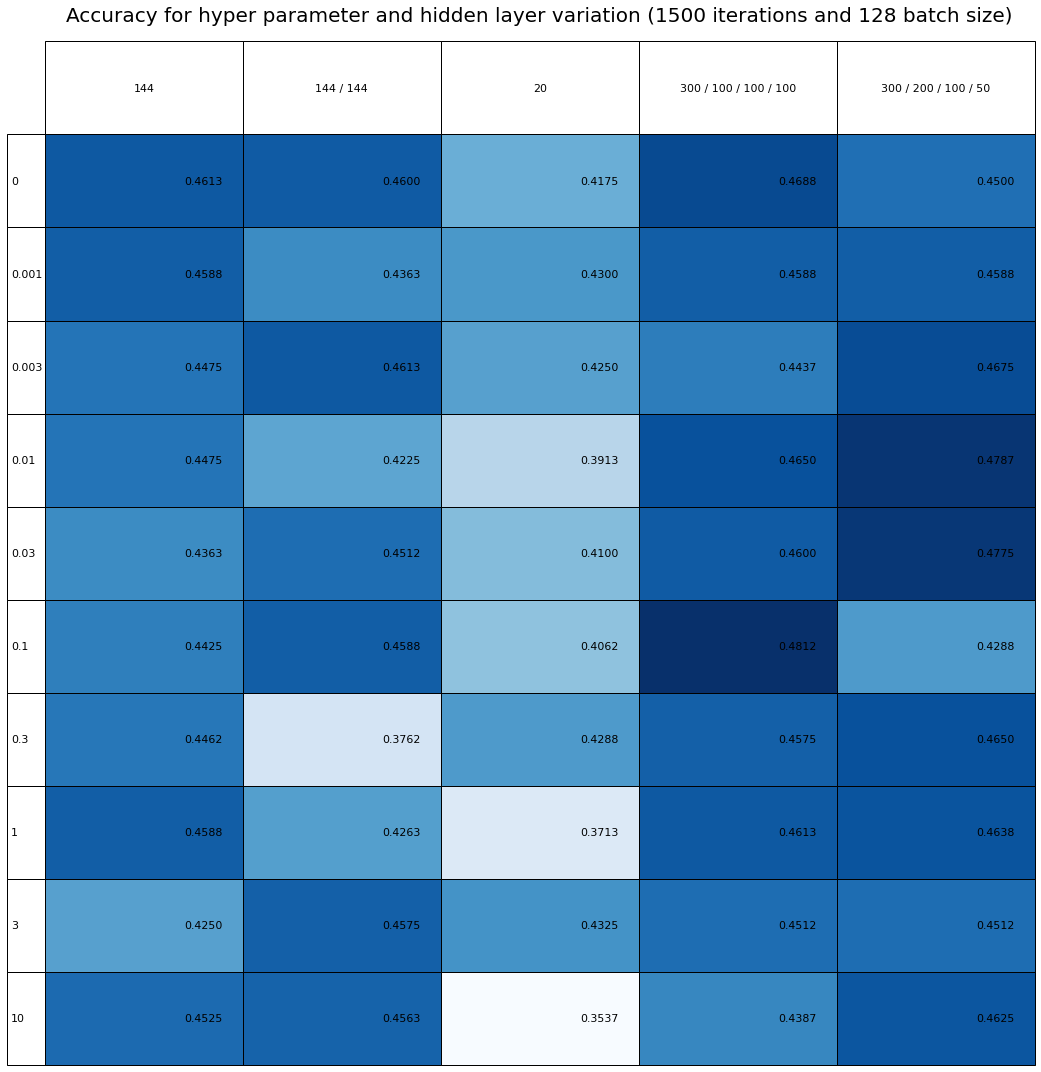

In [31]:
# Output table with relation
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

columns = sorted([hl for hl in list(values[list(values.keys())[0]].keys())])
rows = list(values.keys())
rows.sort(key=lambda x:float(x))

data = [
    [values[r][c] for c in columns]
    for r in rows
]

columns = sorted([' / '.join(hl.split("_")) for hl in columns])

# Colorize cells depending on value
vals = [o for _,others in values.items() for _,o in others.items()]
normal = plt.Normalize(min(vals), max(vals))
cellColours=plt.cm.Blues(normal(data))

the_table = plt.table(
  cellText=[[f'{val:.4f}' for val in lst] for lst in data],
  rowLabels=rows,
  colLabels=columns,
  loc='center',
  cellColours=cellColours,
  bbox=[0.0,0,1,1]
)
# the_table.scale(1.2, 1)
# the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
plt.axis('off')
plt.axis('tight')
plt.title(f"Accuracy for hyper parameter and hidden layer variation ({iterations} iterations and {batchSize} batch size)", fontsize=20, pad=20)    


plt.subplots_adjust(left=0.2, top=20)
plt.tight_layout()

plt.savefig(f"./metrics/{'_'.join(labels)}/accuracyVariation.png")